In [119]:
#MUSHROOM CLASSIFICATION

#DATA FROM: https://www.kaggle.com/datasets/uciml/mushroom-classification

#Attribute Information: (classes: edible=e, poisonous=p)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n

# gill-spacing: close=c,crowded=w,distant=d

In [120]:
#STEP 1: DATA LOADING

import pandas as pd
import numpy as np
df=pd.read_csv('Mushroom.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [121]:
#STEP 2 : EXPLORE THE DATA 

#OUTPUT COLUMN: class

df.dtypes

#object need to convert

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [122]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [123]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [124]:
df.shape

(8124, 23)

In [125]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [126]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [127]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [128]:
#CLASS IS THE OUTPUT COLUMN
#WE DO NOT NEED THE COLUMN 'veil-type' as there is only one unique value, we can drop it
#there are no missing values
df.drop(['veil-type'],axis = 1,inplace = True)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,w,o,e,w,v,l


In [129]:
df[df.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [130]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [131]:
#encoding input to numeric

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
# List of categorical columns to encode
columns_to_encode = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

# Loop through each column and apply LabelEncoder
for i in columns_to_encode:
    df[i] = lab.fit_transform(df[i])

In [132]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,e,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,e,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,p,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [133]:
#STEP4: SEPARATE X AND Y AS ARRAYS
x=df.iloc[:,1:].values
x

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]], shape=(8124, 21))

In [134]:
y=df.iloc[:,0:1].values
y

array([['p'],
       ['e'],
       ['e'],
       ...,
       ['e'],
       ['p'],
       ['e']], shape=(8124, 1), dtype=object)

In [135]:
#STEP 5: CHECK X AND Y DIMENSIONS
x.ndim

2

In [136]:
y.ndim

2

In [137]:
#Most sklearn classifiers expect y to be 1D
y=y.ravel()
y.ndim

1

In [138]:
y

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], shape=(8124,), dtype=object)

In [139]:
#STEP 6: SPLIT THE DATA INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [140]:
x_train

array([[5, 2, 0, ..., 1, 4, 5],
       [5, 0, 3, ..., 2, 5, 0],
       [5, 0, 3, ..., 1, 4, 0],
       ...,
       [2, 3, 4, ..., 3, 5, 4],
       [3, 2, 2, ..., 7, 4, 4],
       [3, 0, 3, ..., 7, 2, 1]], shape=(5686, 21))

In [141]:
x_test

array([[2, 0, 4, ..., 3, 3, 1],
       [2, 2, 2, ..., 7, 4, 2],
       [5, 3, 4, ..., 7, 4, 2],
       ...,
       [5, 0, 3, ..., 1, 4, 0],
       [5, 3, 4, ..., 3, 3, 4],
       [5, 0, 3, ..., 2, 4, 0]], shape=(2438, 21))

In [142]:
#STEP 7: NORMALIZATION not needed for categorical dats
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(x_train)
# x_train=scaler.transform(x_train)
# x_test=scaler.transform(x_test)

In [143]:
#STEP 8: ALGORITHM IMPLEMENTATION
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], shape=(2438,), dtype='<U1')

In [150]:
#STEP 9: CHECKING PREDICTION FOR OUR VALUE
print(model.predict([[5,2,4,1,6,1,0,1,4,1,5,1,2,2,7,7,2,1,4,2,3]]))

['p']


In [145]:
#STEP 10:PERFORMANCE EVALUATION
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm

array([[1176,   81],
       [ 400,  781]])

In [146]:
y_train

array(['p', 'e', 'p', ..., 'e', 'p', 'e'], shape=(5686,), dtype=object)

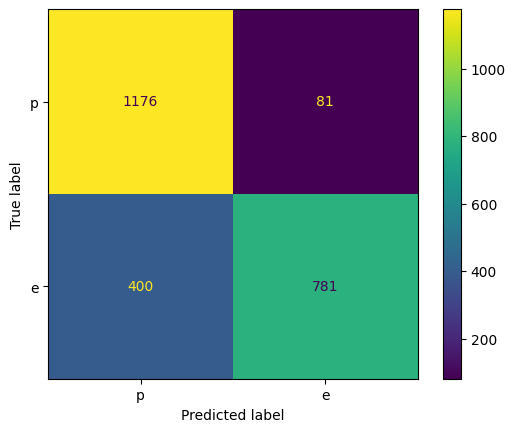

In [147]:
labels=['p','e']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [148]:
score=accuracy_score(y_test,y_pred)
score

0.8027071369975389

In [ ]:
#STEP 11: CLASSIFICATION REPORT based on training and testing data , not entire data
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           e       0.75      0.94      0.83      1257
           p       0.91      0.66      0.76      1181

    accuracy                           0.80      2438
   macro avg       0.83      0.80      0.80      2438
weighted avg       0.82      0.80      0.80      2438

